# Gun Violence in America
## An Exploration through Data

In [111]:
import pandas as pd
import requests 
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# JSON
# https://github.com/dperrymorrow/gun-violence
# "State", "State code", "Total\nmurders", "Total\nfirearms murders, 2011", "Total firearms murders, 2010",
# "% change, 2010-11", "Firearms murders as % of all murders", "Firearms murders per 100,000 population",
# "Firearms robberies per 100,000 pop)", "Firearms assaults per 100,000 population"
json_ms = pd.read_json("C:/Elise/BYU/Winter 2019/ECON 213R/Homework 1/states.json")
json_ms = json_ms.drop(0, axis = 0) # drop the first row, which contained titles as text
json_ms = json_ms.drop(1, axis = 0) # drop the first row again, because it's data for the whole US
json_ms.head()


,0,1,2,3,4,5,6,7,8,9
2,Alaska,AK,29,16,19,-16,55,2.24,18.19,80.47
3,Arizona,AZ,339,222,232,-4,65,3.53,50.24,57.36
4,Arkansas,AR,153,110,93,18,72,4.39,45.45,100.56
5,California,CA,1790,1220,1257,-3,68,3.25,42.97,45.39
6,Colorado,CO,147,73,65,12,50,1.51,25.74,45.72


In [47]:
# CSV FILE
# from https://www.gunviolencearchive.org/query/5e04baa7-f0e2-466b-adf4-f2e40b7dc4ed
# downloaded 1/29/2019

csv_ms = pd.read_csv("C:/Elise/BYU/Winter 2019/ECON 213R/Homework 1/gun violence.csv")
csv_ms.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"January 29, 2019",Indiana,Indianapolis,3000 block of Baltimore Ave,0,1,NaN
1,"January 29, 2019",Pennsylvania,Philadelphia,1900 block of Rowan St,1,0,NaN
2,"January 29, 2019",Florida,Miami,NW 65th St and 35th Ave,0,2,NaN
3,"January 29, 2019",Texas,San Antonio,7800 block of Woodchase Dr,1,0,NaN
4,"January 29, 2019",Illinois,Chicago,5000 block of S Washington Park Ct,0,1,NaN


In [79]:
from pandas import ExcelWriter
from pandas import ExcelFile

# EXCEL FILE
# https://public.opendatasoft.com/explore/dataset/mass-shootings-in-america/information
# Number of Victim Fatalities 	Total Number of Fatalities 	Number of Victims Injured

xlsx_ms = pd.read_excel("C:/Elise/BYU/Winter 2019/ECON 213R/Homework 1/mass-shootings-in-america.xlsx")
#xlsx_ms = xlsx_ms.drop(0, axis = 0)
xlsx_ms.head()

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,Number of Victims Injured,...,Data Source 1,Data Source 2,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,geopoint
0,140,Phoenix Law Firm,"Phoenix, Arizona",Phoenix,Arizona,33.571459,-112.090485,2,3,1,...,http://www.cnn.com/2013/01/31/justice/arizona-...,http://www.usatoday.com/story/news/nation/2013...,http://usnews.nbcnews.com/_news/2013/02/01/168...,http://www.nytimes.com/2013/02/01/us/man-suspe...,http://www.huffingtonpost.com/2013/01/31/phoen...,http://phoenix.gov/police/arthur_douglas_harmo...,http://www.abc15.com/news/region-southeast-val...,Unknown,MS,"33.57145875, -112.0904854"
1,128,Oikos University,"Oakland, California",Oakland,California,37.791768,-122.215317,7,7,3,...,http://berkeley.patch.com/articles/one-l-goh-s...,http://www.bbc.co.uk/news/world-us-canada-1759...,http://abcnews.go.com/US/oikos-university-shoo...,http://latimesblogs.latimes.com/lanow/2012/04/...,NaN,NaN,NaN,Unknown,MS,"37.79176806, -122.2153171"
2,158,Fort Hood,"Killeen, Texas",Killeen,Texas,31.079255,-97.733923,3,4,16,...,http://www.cnn.com/2014/04/02/us/fort-hood-sho...,http://www.huffingtonpost.com/2014/04/07/ivan-...,http://www.usatoday.com/story/news/nation/2014...,NaN,NaN,NaN,NaN,Yes,MS,"31.07925506, -97.73392317"
3,261,"Lawrenceburg, Tennessee","Lawrenceburg, Tennessee",Lawrenceburg,Tennessee,35.242302,-87.334739,1,2,2,...,http://www.al.com/news/huntsville/index.ssf/20...,http://www.al.com/news/huntsville/index.ssf/20...,http://www.timesdaily.com/news/brothers-improv...,NaN,NaN,NaN,NaN,Unknown,MS,"35.242302, -87.334739"
4,262,"Louisburg, North Carolina","Louisburg, North Carolina",Louisburg,North Carolina,36.099039,-78.301106,3,3,0,...,http://wncn.com/2016/03/27/suspect-in-louisbur...,http://abc11.com/news/3-dead-in-franklin-count...,http://myfox8.com/2016/03/27/gov-mccrory-offer...,http://www.wral.com/1-dead-2-injured-in-shooti...,http://wncn.com/2016/03/26/2-dead-1-injured-in...,NaN,NaN,Unknown,MS,"36.099039, -78.301106"


## The Shooters

Text(0, 0.5, 'Frequency')

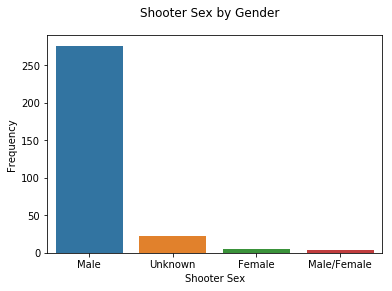

In [39]:
from matplotlib.pyplot import suptitle

suptitle("Shooters by Gender")
ax = sns.countplot(xlsx_ms['Shooter Sex'])
ax.set_ylabel("Frequency")


The shooters are overwhelmingly male. More shooters are "unknown" (unknown, male/female) than female. 

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

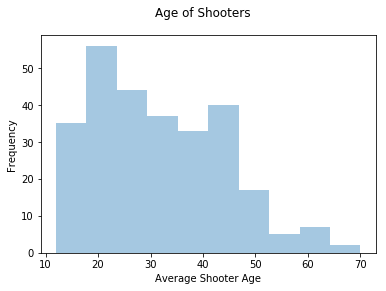

In [67]:
suptitle("Age of Shooters")
A = xlsx_ms['Average Shooter Age']
Anan = A[~np.isnan(A)] # remove the NaNs
b = sns.distplot(Anan, kde = False)
b.set_ylabel("Frequency")


The shooters also tend to be younger, with the majority being younger than 40. 

## Gun Violence by State (2011)

## Shootings of 2019

Text(0.5, 0, 'States')

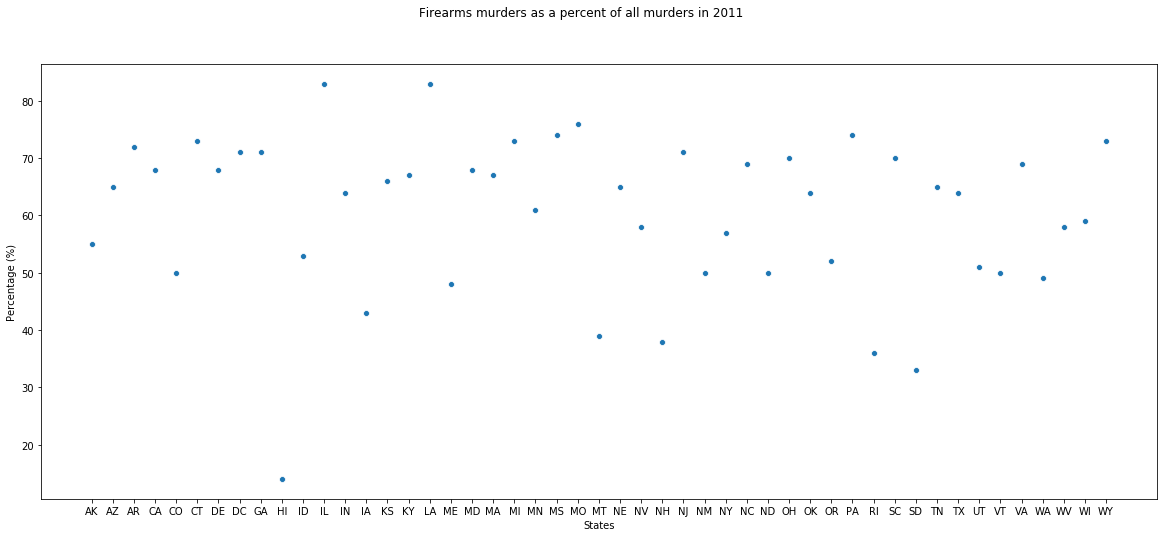

In [117]:
F, ax = plt.subplots(figsize = (20, 8))

json_ms[6] = pd.to_numeric(json_ms[6]) # convert y to a numeric variable

suptitle("Firearms murders as a percent of all murders in 2011")
ax = sns.scatterplot(x = json_ms[1], y = json_ms[6])
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("States")



Idaho and Louisiana have the highest proportion of firearms being used in homicides. 

Text(0.5, 0, 'Number of Fatalities')

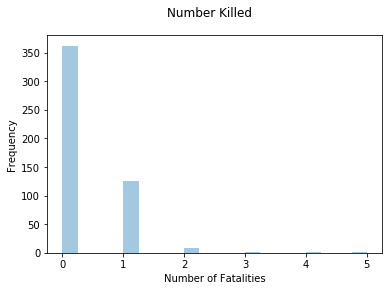

In [86]:
suptitle("Number Killed in 2019 Gun Violence")
C = csv_ms['# Killed']
Cnan = C[~np.isnan(C)] # remove the NaNs
d = sns.distplot(Cnan, kde = False)
d.set_ylabel("Frequency")
d.set_xlabel("Number of Fatalities")

Text(0.5, 0, 'Number of Injuries')

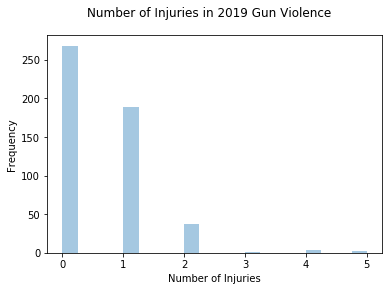

In [88]:
suptitle("Number of Injuries in 2019 Gun Violence")
C = csv_ms['# Injured']
Cnan = C[~np.isnan(C)] # remove the NaNs
d = sns.distplot(Cnan, kde = False)
d.set_ylabel("Frequency")
d.set_xlabel("Number of Injuries")